# TS7: Transformada Z y Respuesta en frecuencia
## Catalina Gonzalez Araujo y Lola Pampin
### 2do cuatrimestre 2025, ECYT - UNSAM

# Introducción

## I. Filtro de media móvil

"Un filtro de media móvil se define como una técnica de procesamiento digital para suavizar datos de series temporales y reducir el ruido al calcular el promedio de un conjunto de datos consecutivos. Utiliza una "ventana" aplicada a los datos, tomando el promedio de las muestras dentro de esa ventana para obtener un nuevo punto de datos filtrado. Es una forma sencilla y eficaz de eliminar fluctuaciones rápidas para ver la tendencia subyacente, actuando como un filtro de paso bajo. "

Expresión Matemática del Filtro de Media Móvil

Un filtro de media móvil de longitud M toma el promedio de las últimas M muestras:

$$
y[n] = \frac{1}{M} \sum_{k=0}^{M-1} x[n-k]
$$

Donde:
x[n]: señal de entrada.

y[n]: señal filtrada.

M: tamaño de la ventana.

Este filtro es lineal e invariante en el tiempo y actúa como un filtro de paso bajo.

## II. Función transferencia (H(z))

La transformada Z es una herramienta fundamental que permite el análisis de señales y sistemas en el dominio de la frecuencia, especialmente útil cuando la secuencia de tiempo discreto h[n] no es absolutamente sumable (condición necesaria para que exista la DTFT). Modifica la transformada de Fourier agregándole un grado de libertad más para manejar casos donde la secuencia h[n] diverge. Matemáticamente se describe de la siguiente manera:

$$
h[n]*r^{-n} 
$$

donde r $\in \mathbb{R}$ tal que $h[n]*r^{-n}$ es absolutamente sumable.

La función transferencia se define como

$$
H(r,\omega) \triangleq \mathcal{F}\{h[n] r^{-n}\} = \sum_{n=-\infty}^{\infty} \big(h[n] r^{-n}\big) e^{-j\omega n} = \sum_{n=-\infty}^{\infty} h[n] \big(re^{j\omega}\big)^{-n}. 
$$
$$
H(z) = \mathcal{Z}\{h[n]\} \triangleq \sum_{n=-\infty}^{\infty} h[n] \underbrace{\big(re^{j\omega}\big)}_{z}^{-n} = \sum_{n=-\infty}^{\infty} h[n] z^{-n}.
$$

## III. Ecuaciones en diferencias lineales con coeficientes constantes (LCCDE)

Analizar un sistema expresado en ecuaciones en diferencias, implica observarlo en el siguiente formato:

$$
y[n] = \sum_{k=0}^{M-1} b_k \, x[n-k] \;-\; \sum_{k=1}^{N-1} a_k \, y[n-k].
$$

Si $a_k =0$ todos los valores dependen de los valores presentes y pasados de la entrada, lo cual implica que el sistema se trata de un filtro FIR. En el caso contrario, sería un filtro IIR.

Aplicando la transformada Z a este tipo de sistemas, se obtiene

$$
H (z)= \frac {Y(z)}{X(z)}
$$

## IV. Respuesta en frecuencia
La respuesta en frecuencia H($\omega$) se define como la transformada Z valuada en z=$e^{j\omega}$
Al tratarse de un número complejo, para su análisis resulta interesante obtener su módulo y fase:

$$
|H(\omega)| = \sqrt{Re^2 + Img^2} 
$$

$$
\angle H(\omega) = arctg\left(\frac{Img}{Re}\right)
$$

# Desarrollo
Se proponen el estudio de las siguientes ecuaciones en diferencias

a) y(n)=x(n−3)+x(n−2)+x(n−1)+x(n)


b) y(n)=x(n−4)+x(n−3)+x(n−2)+x(n−1)+x(n)


c)  y(n)=x(n)−x(n−1)


d)  y(n)=x(n)−x(n−2)
 
### 1. Encontrar la función transferencia T(z)= Y(z)/X(z)
Para la realización de este inciso se aplico la transformada Z a las ecuaciones en diferencias

$$
\mathcal{Z} (x(n−k))= z^{−k}X(z)
$$

Y se obtuvo:

$$
\begin{align*}
\text{a) } T(z) &= 1 + z^{-1} + z^{-2} + z^{-3} \\
\text{b) } T(z) &= 1 + z^{-1} + z^{-2} + z^{-3} + z^{-4} \\
\text{c) } T(z) &= 1 - z^{-1} \\
\text{d) } T(z) &= 1 - z^{-2}
\end{align*}
$$
### 2. Hallar el modulo y la respuesta de fase
### 3. Simular y validar la respuesta en frecuencia de todos los sistemas con Numpy.

In [7]:
# librerias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk

In [8]:
# Definir variable z
z = sp.Symbol('z')

# Transformada de las ecuaciones en diferencias
T_a = z**(-3) + z**(-2) + z**(-1) + 1
T_b = z**(-4) + z**(-3) + z**(-2) + z**(-1) + 1
T_c = 1 - z**(-1)
T_d = 1 - z**(-2)

print("Forma original:")
print("a) T(z) =", T_a)
print("b) T(z) =", T_b)
print("c) T(z) =", T_c)
print("d) T(z) =", T_d)

# Normalizada
T_a_norm = sp.expand(T_a * z**3)
T_b_norm = sp.expand(T_b * z**4)
T_c_norm = sp.expand(T_c * z)
T_d_norm = sp.expand(T_d * z**2)

print("\nForma normalizada:")
print("a) T(z) =", T_a_norm)
print("b) T(z) =", T_b_norm)
print("c) T(z) =", T_c_norm)
print("d) T(z) =", T_d_norm)

Forma original:
a) T(z) = 1 + 1/z + z**(-2) + z**(-3)
b) T(z) = 1 + 1/z + z**(-2) + z**(-3) + z**(-4)
c) T(z) = 1 - 1/z
d) T(z) = 1 - 1/z**2

Forma normalizada:
a) T(z) = z**3 + z**2 + z + 1
b) T(z) = z**4 + z**3 + z**2 + z + 1
c) T(z) = z - 1
d) T(z) = z**2 - 1


C:\Users\lolyy\AppData\Local\Temp\ipykernel_47180\1850710287.py:25: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w/np.pi, 20*np.log10(abs(h)), label=f'Sistema {label}')


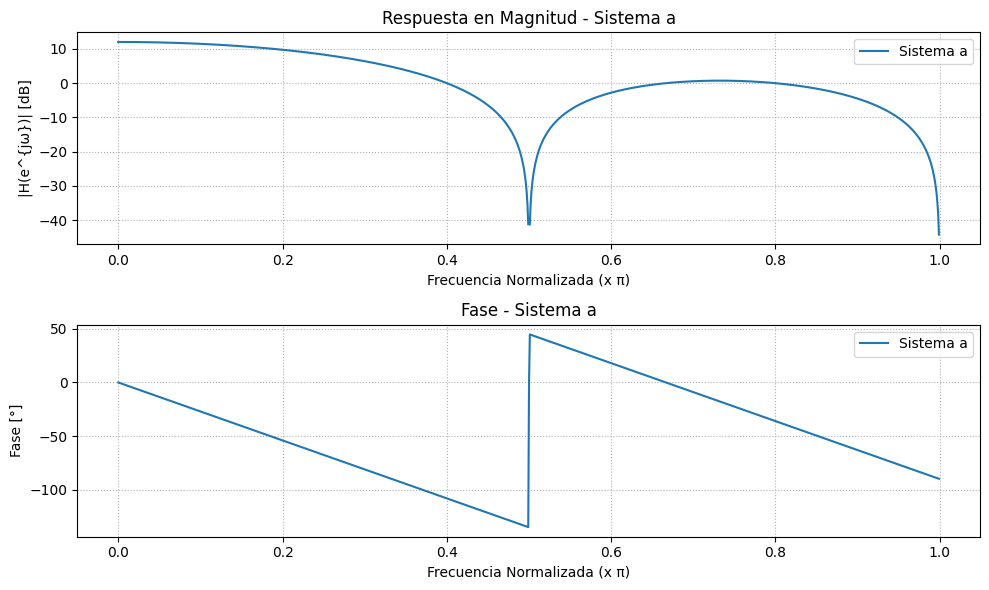

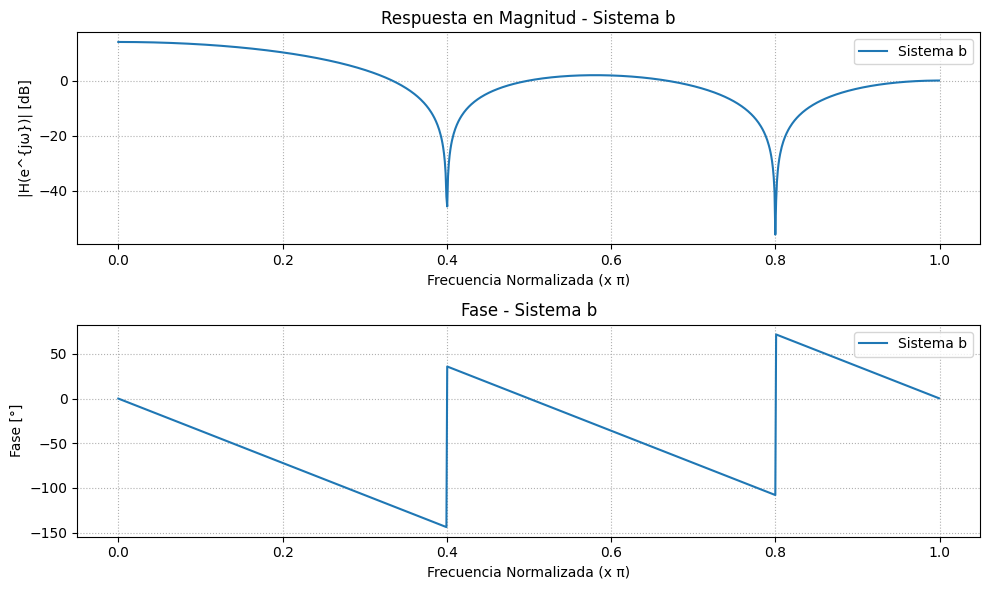

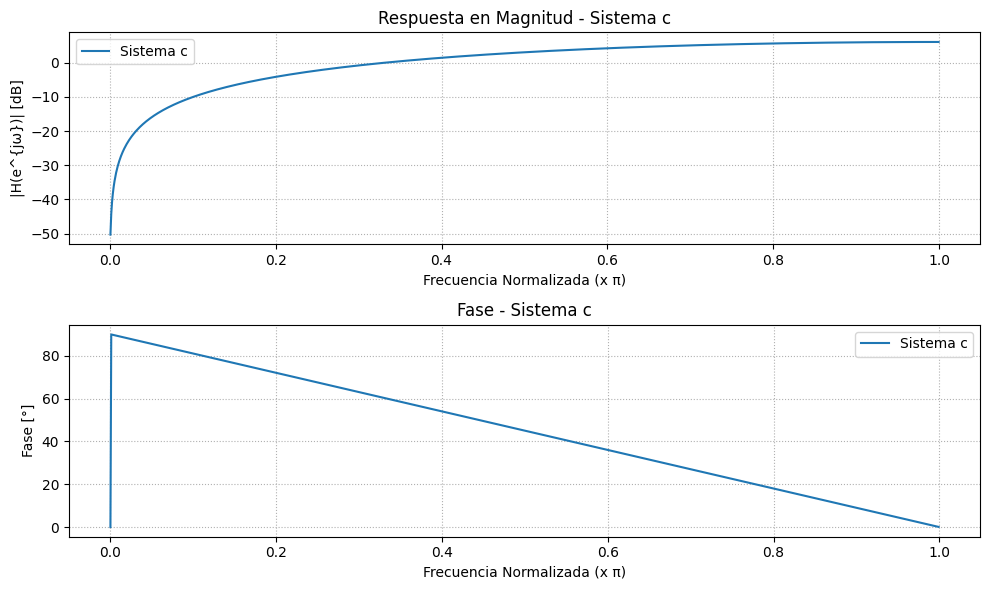

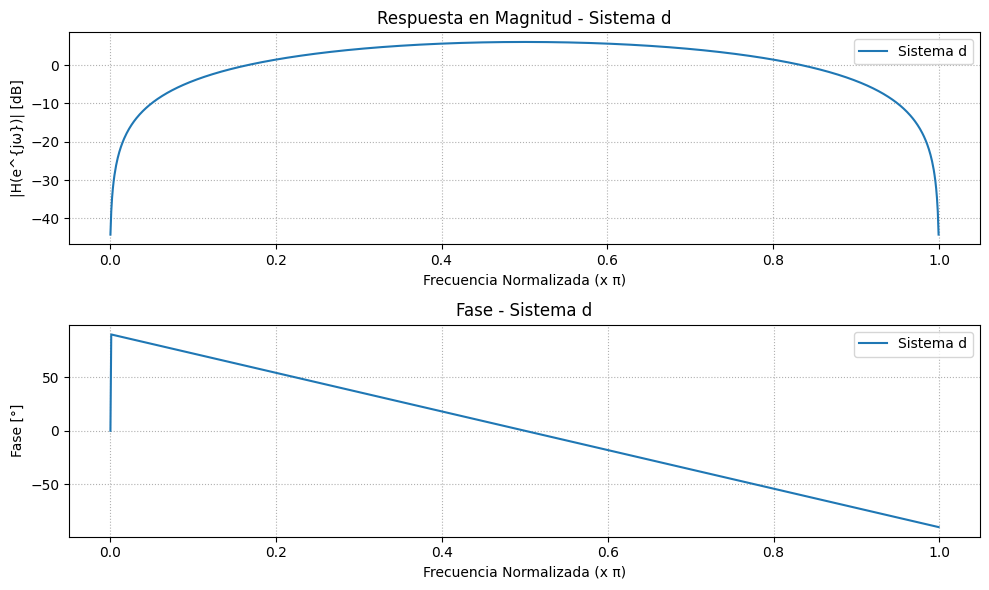

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Definino los sistemas
sistemas = {
    'a': ([1, 1, 1, 1], [1]),
    'b': ([1, 1, 1, 1, 1], [1]),
    'c': ([1, -1], [1]),
    'd': ([1, 0, -1], [1])
}

for label, (b, a) in sistemas.items():
    # Respuesta en frecuencia
    w, h = freqz(b, a, worN=1024)
    
    # Fase desenvuelta
    phase = np.unwrap(np.angle(h))
    
    # --- Gráficas ---
    plt.figure(figsize=(10, 6))
    
    # Magnitud
    plt.subplot(2, 1, 1)
    plt.plot(w/np.pi, 20*np.log10(abs(h)), label=f'Sistema {label}')
    plt.title(f'Respuesta en Magnitud - Sistema {label}')
    plt.xlabel('Frecuencia Normalizada (x π)')
    plt.ylabel('|H(e^{jω})| [dB]')
    plt.grid(True, which='both', ls=':')
    plt.legend()
    
    # Fase
    plt.subplot(2, 1, 2)
    plt.plot(w/np.pi, np.degrees(phase), label=f'Sistema {label}')
    plt.title(f'Fase - Sistema {label}')
    plt.xlabel('Frecuencia Normalizada (x π)')
    plt.ylabel('Fase [°]')
    plt.grid(True, which='both', ls=':')
    plt.legend()
    
    plt.tight_layout()


C:\Users\lolyy\AppData\Local\Temp\ipykernel_47180\3048570280.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w/np.pi, 20*np.log10(np.abs(H)), label=f'Sistema {label}')


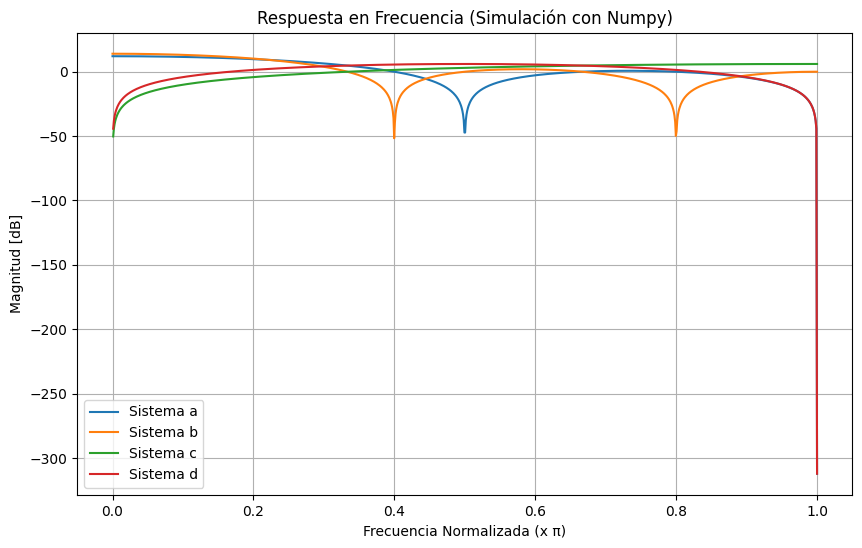

In [11]:
sistemas = {
    'a': [1, 1, 1, 1],
    'b': [1, 1, 1, 1, 1],
    'c': [1, -1],
    'd': [1, 0, -1]
}

# Vector de frecuencias
N = 1024
w = np.linspace(0, np.pi, N)  # frecuencia normalizada [0, π]

plt.figure(figsize=(10, 6))

for label, b in sistemas.items():
    # Calculamos H(e^{jw}) usando la definición
    H = np.zeros_like(w, dtype=complex)
    for k, bk in enumerate(b):
        H += bk * np.exp(-1j * w * k)
    
    # Magnitud en dB
    plt.plot(w/np.pi, 20*np.log10(np.abs(H)), label=f'Sistema {label}')

plt.title('Respuesta en Frecuencia (Simulación con Numpy)')
plt.xlabel('Frecuencia Normalizada (x π)')
plt.ylabel('Magnitud [dB]')
plt.grid(True)
plt.legend()
plt.show()

# Conclusiones